In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import os

import hmf
from hmf import MassFunction
from hmf.cosmology import Cosmology
#from hmf.mass_definitions import SOMean
print(hmf.__file__)
print(hmf.__version__)


import sys
print(sys.executable)

#!{sys.executable} -m pip install hmf

h = 0.7

/global/homes/x/xintang/anaconda3/lib/python3.12/site-packages/hmf/__init__.py
3.5.1
/global/homes/x/xintang/anaconda3/bin/python


In [2]:
#tmf in cosmosis with modules = consistency camb rescale mf_tinker
mass = np.loadtxt('./mock_mf/results_mf/mass_function/m_h.txt', comments='#')
dndlnmh = np.loadtxt('./mock_mf/results_mf/mass_function/dndlnmh.txt', comments='#')

#tmf in cosmosis with modules = camb mf_tinker
mass_new = np.loadtxt('./mock_mf/results_mf_new/mass_function/m_h.txt', comments='#')
dndlnmh_new = np.loadtxt('./mock_mf/results_mf_new/mass_function/dndlnmh.txt', comments='#')

# Store each row into a list
dndm = [row for row in dndlnmh]

In [ ]:
# Prepare redshift bins and result arrays
z_edges = [0.1 * i for i in range(0, 31)]  # z = 0.1 to 1.0
dndlnmh_list = []

# Loop through redshift bins and compute mass functions
for z in z_edges:
    mf = MassFunction(
        z=z,
        cosmo_params={"H0": 70, "Om0": 0.318, "Ob0": 0.04},
        sigma_8=0.8,
        n=0.96,
        hmf_model='Tinker08',
        Mmin=10, Mmax=16, dlog10m=0.01
    )
    if z == z_edges[0]:
        m_h = mf.m  # Only need to save mass array once
    dndlnmh_list.append(mf.dndlnm)

# Convert list to 2D array
dndlnmh_array = np.array(dndlnmh_list)

# Ensure output directory exists
os.makedirs("./mock_mf/results_hmf", exist_ok=True)

# Save mass and mass function files
np.savetxt("./mock_mf/results_hmf/m_h.txt", m_h)
np.savetxt("./mock_mf/results_hmf/dndlnmh.txt", dndlnmh_array)

/global/homes/x/xintang/anaconda3/lib/python3.12/site-packages/hmf/density_field/transfer_models.py:233: UserWarning: 'extrapolate_with_eh' was not set. Defaulting to True, which is different behaviour than versions <=3.4.4. This warning may be removed in v4.0. Silence it by setting extrapolate_with_eh explicitly.
  warnings.warn(


In [3]:
len(dndlnmh[0, :])-len(mass)

0

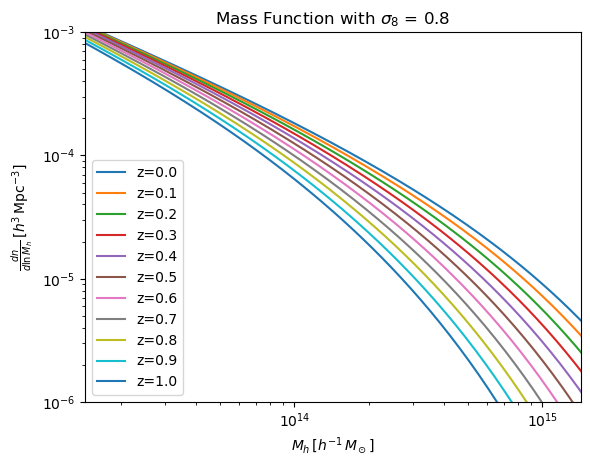

In [10]:
# Plotting the Tinker mass function provided by cosmosis
for i in range(11):
    plt.loglog(mass[300:], dndm[i][300:], label=f'z={0.1*i:.1f}')

plt.xlim(1e13 / h, 1e15 / h)
plt.ylim(1e-6, 1e-3)
plt.legend()
#plt.xscale('log')
plt.xlabel(r'$M_h\, [h^{-1}\, M_\odot]$')
plt.ylabel(r'$\frac{d n}{d \ln M_h}\, [h^3\, \mathrm{Mpc}^{-3}]$')
plt.title(r'Mass Function with $\sigma_8$ = 0.8')
plt.savefig('mf_z.png', dpi=300)

In [4]:
# Define redshift range: 0 to 1
z_indices = range(1, 11)
print(z_indices[1], z_indices[9], len(z_indices))

z_edges = [0.1 * i for i in range(1, 11)]  # Redshift bins: z=0.1 to z=1.0

2 10 10


Numbers of halos in each mass bin at different redshifts: [Mpc-3]

Redshift      1e13–1e14 [M_solar]    1e14–1e15 [M_solar]    1e13–1e15 [M_solar]
z=0.1                1.030071e-03           8.594521e-05           1.119548e-03
z=0.2                9.981000e-04           7.603267e-05           1.077391e-03
z=0.3                9.615960e-04           6.630531e-05           1.030872e-03
z=0.4                9.205857e-04           5.697692e-05           9.802373e-04
z=0.5                8.753896e-04           4.823668e-05           9.260032e-04
z=0.6                8.265629e-04           4.023229e-05           8.688792e-04
z=0.7                7.748332e-04           3.306187e-05           8.096973e-04
z=0.8                7.210355e-04           2.677310e-05           7.493455e-04
z=0.9                6.660528e-04           2.136815e-05           6.887133e-04
z=1.0                6.107642e-04           1.681191e-05           6.286478e-04

z=0.1                3.301537e-04           1.502937

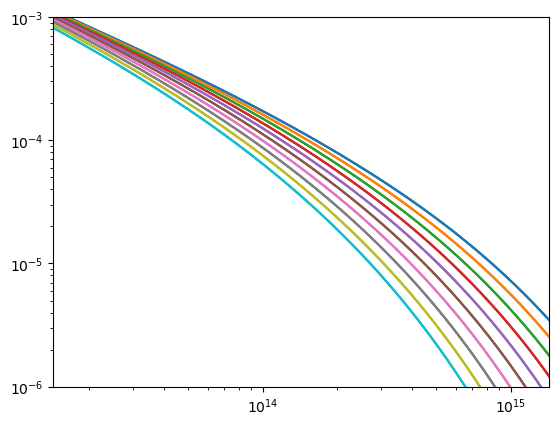

In [6]:
# Define mass bins (in M_sun/h units)
mass_bins = [
    (1e13 / h, 1e14 / h),
    (1e14 / h, 1e15 / h),
    (1e13 / h, 1e15 / h)
]
bin_labels = ['1e13–1e14 [M_solar]', '1e14–1e15 [M_solar]', '1e13–1e15 [M_solar]']

# Compute halo number densities for each bin and redshift
halo_counts = {label: {} for label in bin_labels}
halo_counts_hmf = {label: {} for label in bin_labels}

# Loop over redshifts and compute mass function
results = {}
for z in z_edges:
    mf = MassFunction(
    z=z,
    cosmo_params={"H0":70, "Om0":0.318, "Ob0":0.04},
    sigma_8=0.8,
    n=0.96,
    hmf_model='Tinker08', #'Jenkins',
    Mmin=10, Mmax=16, dlog10m=0.01,
    mdef_model='SOMean'#mdef=SOMean(200)  # 200 × mean density  # Match overdensity definition
)
    results[z] = {
        "Mass": mf.m,           # Mass array (Msun/h)
        "dndlnM": mf.dndlnm     # dn/dlnM (h^3 Mpc^-3)
    }
    

for (m_min, m_max), label in zip(mass_bins, bin_labels):
    mask = (mass >= m_min) & (mass <= m_max)
    mass_sel = mass[mask]
    lnmass = np.log(mass_sel)

    for i, z in zip(z_indices, z_edges):
        dndlnm = np.array(dndm[i])[mask]
        N = np.trapz(dndlnm, x=lnmass)
        halo_counts[label][f"z={z:.1f}"] = N
        plt.loglog(mass, dndlnmh[i])
        plt.xlim(1e13/h, 1e15/h)
        #plt.xlim(1e16/h, 1e18/h)
        plt.ylim(1e-6, 1e-3)
        
        mass_hmf = results[z]["Mass"]
        mass_mask_hmf = (mass_hmf >= m_min) & (mass_hmf <= m_max)
        mass_sel_hmf = mass_hmf[mass_mask_hmf]
        lnmass_hmf = np.log(mass_sel_hmf)
        dndlnm_hmf = np.array(results[z]["dndlnM"])[mass_mask_hmf]
        N_hmf = np.trapz(dndlnm_hmf, x=lnmass_hmf)
        halo_counts_hmf[label][f"z={z:.1f}"] = N_hmf
        

      

# Print results in table format
print("Numbers of halos in each mass bin at different redshifts: [Mpc-3]")
print()
print(f"{'Redshift':<10}", end='')
for label in bin_labels:
    print(f"{label:>23}", end='')
print()

for z in [f"z={0.1 * i:.1f}" for i in z_indices]:
    print(f"{z:<10}", end='')
    for label in bin_labels:
        print(f"{halo_counts[label][z]:>23e}", end='')
    print()
print()
    
for z in [f"z={0.1 * i:.1f}" for i in z_indices]:
    print(f"{z:<10}", end='')
    for label in bin_labels:
        print(f"{halo_counts_hmf[label][z]:>23e}", end='')
    print()
    


In [7]:
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

# --- Define cosmology  ---
h = 0.7
H0 = h * 100  # km/s/Mpc
Om0 = 0.318
Ob0 = 0.04
cosmo = FlatLambdaCDM(H0=H0, Om0=Om0, Ob0=Ob0)

# --- Mass and redshift bin setup ---
mass_bins = [
    (1e13 / h, 1e14 / h),
    (1e14 / h, 1e15 / h),     # clusters
    (3e14 / h, 1e15 / h)      # high-mass clusters only
]
bin_labels = ['1e13–1e14','1e14–1e15', '3e14–1e15']

# --- Initialize results dictionaries ---
halo_counts = {label: {} for label in bin_labels}
halo_counts_hmf = {label: {} for label in bin_labels}
volume_shells = {}  # Store comoving volumes

# --- Loop over bins and compute number counts ---
for i in range(len(z_edges) - 1):
    z_low = z_edges[i]
    z_high = z_edges[i + 1]
    z_mid = 0.5 * (z_low + z_high)

    # Comoving volume between z_low and z_high (full sky)
    volume_shell = (cosmo.comoving_volume(z_high)- cosmo.comoving_volume(z_low)).to(u.Mpc**3).value
    volume_shell /= h**3  # Convert to h^3 Mpc^3
    f_sky = 1000 / 41253  # if your survey covers 1000 deg²
    volume_shell *= f_sky #* 4 * np.pi  # Adjust for the fraction of the sky
    print("comoving volume:", f"{z_low:.1f}", cosmo.comoving_volume(z_low))
    volume_shells[f"z={z_low:.1f}–{z_high:.1f}"] = volume_shell

    for (m_min, m_max), label in zip(mass_bins, bin_labels):# what is this doing?
        mass_mask = (mass >= m_min) & (mass <= m_max)
        mass_sel = mass[mass_mask]
        lnmass = np.log(mass_sel)

        dndlnm = np.array(dndlnmh[i + 1])[mass_mask]  # adjust index if needed
        # For hmf results
            
        mass_hmf = np.array(results[z_high]["Mass"])
        mass_mask_hmf = (mass_hmf >= m_min) & (mass_hmf <= m_max)
        mass_sel_hmf = mass_hmf[mass_mask_hmf]
        lnmass_hmf = np.log(mass_sel_hmf)
        dndlnm_hmf = np.array(results[z_high]["dndlnM"])[mass_mask_hmf]

        # Integrate over lnM to get number density (Mpc^-3)
        number_density = np.trapz(dndlnm, x=lnmass)
        number_density_hmf = np.trapz(dndlnm_hmf, x=lnmass_hmf)

        # Multiply to get total number of halos
        N_halos = number_density * volume_shell # whay * not / ? 
        N_halos_hmf = number_density_hmf * volume_shell
        halo_counts[label][f"z={z_low:.1f}–{z_high:.1f}"] = N_halos
        halo_counts_hmf[label][f"z={z_low:.1f}–{z_high:.1f}"] = N_halos_hmf

# --- Print results with crossing volume ---
print(f"{'Redshift Bin':<15} {'Volume (h^3 Mpc^3)':>20}", end='')
for label in bin_labels:
    print(f"{label:>20}", end='')
print()

for i in range(len(z_edges) - 1):
    z_key = f"z={z_edges[i]:.1f}–{z_edges[i+1]:.1f}"
    print(f"{z_key:<15} {volume_shells[z_key]:>20.3e}", end='')
    for label in bin_labels:
        print(f"{halo_counts[label][z_key]:>20.3e}", end='')
    print()

print()

for i in range(len(z_edges) - 1):
    z_key = f"z={z_edges[i]:.1f}–{z_edges[i+1]:.1f}"
    print(f"{z_key:<15} {volume_shells[z_key]:>20.3e}", end='')
    for label in bin_labels:
        print(f"{halo_counts_hmf[label][z_key]:>20.3e}", end='')
    print()

comoving volume: 0.1 305693194.5335526 Mpc3
comoving volume: 0.2 2263933481.5783505 Mpc3
comoving volume: 0.3 7054325120.780782 Mpc3
comoving volume: 0.4 15408681434.891928 Mpc3
comoving volume: 0.5 27699535905.57729 Mpc3
comoving volume: 0.6 44029120276.26301 Mpc3
comoving volume: 0.7 64308780618.26414 Mpc3
comoving volume: 0.8 88324242462.74728 Mpc3
comoving volume: 0.9 115785978693.45148 Mpc3
Redshift Bin      Volume (h^3 Mpc^3)           1e13–1e14           1e14–1e15           3e14–1e15
z=0.1–0.2                  1.384e+08           1.426e+05           1.189e+04           2.078e+03
z=0.2–0.3                  3.385e+08           3.379e+05           2.574e+04           4.159e+03
z=0.3–0.4                  5.904e+08           5.677e+05           3.915e+04           5.798e+03
z=0.4–0.5                  8.686e+08           7.996e+05           4.949e+04           6.659e+03
z=0.5–0.6                  1.154e+09           1.010e+06           5.567e+04           6.743e+03
z=0.6–0.7          

mass shape: (969,)
dndlnm shape: (969,)


/tmp/ipykernel_2294050/637803522.py:27: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(mass_w1), np.log10(y))


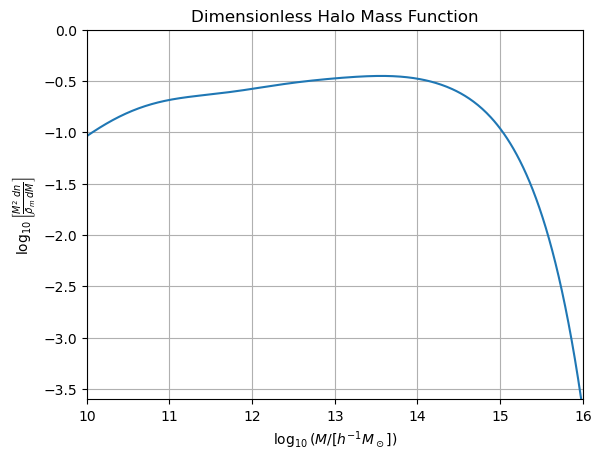

In [44]:
# Constants
H0 = h * 100  # km/s/Mpc
G = 4.302e-9  # Mpc M_sun^-1 (km/s)^2
rho_crit_0 = 3 * H0**2 / (8 * np.pi * G)  # in M_sun / Mpc^3
rho_m = Om0 * rho_crit_0  # mean matter density

# Input data
mass_w1 = np.loadtxt('./results_mf_z03_w1/mass_function/m_h.txt', comments='#')
dndlnmh_w1 = np.loadtxt('./results_mf_z03_w1/mass_function/dndlnmh.txt', comments='#')

# Store each row into a list
dndm_w1 = [row for row in dndlnmh_w1]
dndlnm_w1 = dndlnmh_w1[5]  # pick redshift z=0.5 row

print("mass shape:", mass_w1.shape)
print("dndlnm shape:", dndlnm_w1.shape)

# Convert dn/dlnM to dn/dM
dndm_w1 = dndlnm_w1 / mass_w1  # still in h^3 Mpc^-3


# Compute dimensionless mass function
y = (mass_w1**2 / rho_m) * dndm_w1

# Plot
#plt.figure(figsize=(6, 4))
plt.plot(np.log10(mass_w1), np.log10(y))
plt.xlim(10, 16)
plt.ylim(-3.6, 0)
plt.xlabel(r'$\log_{10}(M / [h^{-1} M_\odot])$')
plt.ylabel(r'$\log_{10}\left[\frac{M^2}{\bar{\rho}_m} \frac{dn}{dM}\right]$')
plt.title('Dimensionless Halo Mass Function')
plt.grid(True)
plt.show()

mass shape: (969,)
dndlnm shape: (969,)


/tmp/ipykernel_2294050/3369263970.py:15: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(mass), np.log10(y))


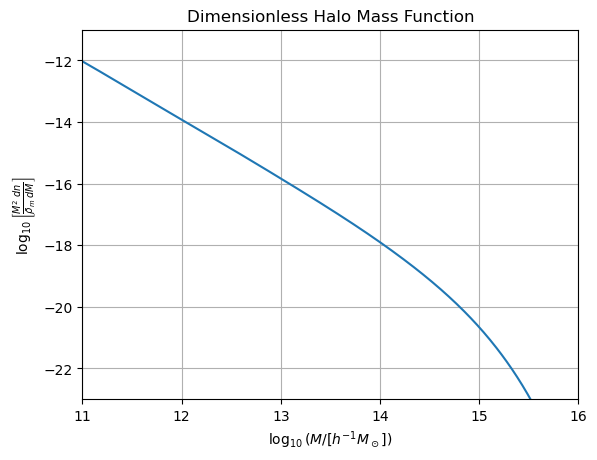

In [45]:
dndlnm = dndlnmh[5]  # pick redshift z=0.5 row
dndlnm_new = dndlnmh_new[5]

print("mass shape:", mass.shape)
print("dndlnm shape:", dndlnm.shape)

# Convert dn/dlnM to dn/dM
dndm = dndlnm / mass
dndm_new = dndlnm_new / mass_new # still in h^3 Mpc^-3

y = dndm

# Plot
#plt.figure(figsize=(6, 4))
plt.plot(np.log10(mass), np.log10(y))
plt.xlim(11, 16)
plt.ylim(-23, -11)
plt.xlabel(r'$\log_{10}(M / [h^{-1} M_\odot])$')
plt.ylabel(r'$\log_{10}\left[\frac{M^2}{\bar{\rho}_m} \frac{dn}{dM}\right]$')
plt.title('Dimensionless Halo Mass Function')
plt.grid(True)
plt.show()

/tmp/ipykernel_2294050/1215713343.py:40: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(mass), np.log10(dndm), label='CosmoSIS Tinker08')
/tmp/ipykernel_2294050/1215713343.py:41: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(mass_new), np.log10(dndm_new), label='CosmoSIS_new Tinker08')


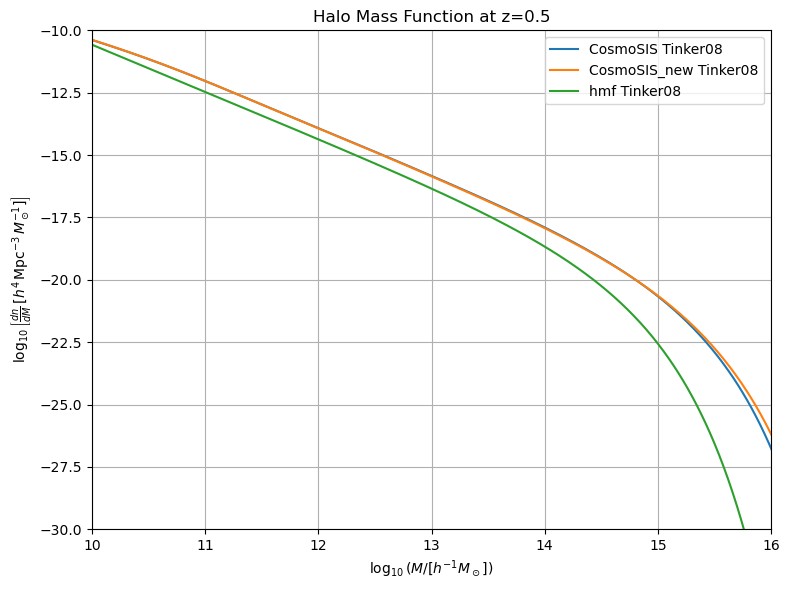

In [ ]:
# Initialize MassFunction with custom cosmological parameters
mf = MassFunction(
    Mmin=10, Mmax=16, dlog10m=0.01,
    z=0.55,
    cosmo_params={"H0":70, "Om0":0.318, "Ob0":0.04},
    sigma_8=0.8,
    n=0.96,
    hmf_model='Tinker08'
)

mf1 = MassFunction(
    Mmin=10, Mmax=16, dlog10m=0.05,
    z=0.4,
    cosmo_params={"H0":70, "Om0":0.318, "Ob0":0.04},
    sigma_8=0.8,
    n=0.96,
    hmf_model='Tinker08'
)

#print(MassFunction.parameter_info())

#mf.update(cosmo_params={"Ob0": 0.04}) #update baryon density and redshift



# Access mass and dn/dlnM arrays
Mass = mf.m       # Mass in M_sun/h
dndlnM = mf.dndlnm  # dn/dlnM in h^3 Mpc^-3

Mass1 = mf1.m       # Mass in M_sun/h
dndlnM1 = mf1.dndlnm  # dn/dlnM in h^3 Mpc^-3

# Convert dn/dlnM to dn/dM
dndM = dndlnM / Mass  # Units: h^4 Mpc^-3 M_sun^-1

plt.figure(figsize=(8, 6))
plt.plot(np.log10(mass), np.log10(dndm), label='CosmoSIS Tinker08')
plt.plot(np.log10(mass_new), np.log10(dndm_new), label='CosmoSIS_new Tinker08')
plt.plot(np.log10(Mass), np.log10(dndM), label='hmf Tinker08')
plt.xlim(10, 16)
plt.ylim(-30, -10)
plt.xlabel(r'$\log_{10}(M / [h^{-1} M_\odot])$')
plt.ylabel(r'$\log_{10}\left[\frac{dn}{dM} \, [h^4 \, \mathrm{Mpc}^{-3} \, M_\odot^{-1}]\right]$')
plt.title('Halo Mass Function at z=0.5')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [47]:
volume_shell = (cosmo.comoving_volume(0.5)- cosmo.comoving_volume(0.4)).to(u.Mpc**3).value
volume_shell /= h**3  # Convert to h^3 Mpc^3
f_sky = 1000 / 41253  # if your survey covers 1000 deg²
volume_shell *= f_sky #* 4 * np.pi  # Adjust for the fraction of the sky

mass_mask = (Mass >= 1e14) & (Mass <= 1e15)
mass_sel = Mass[mass_mask]
lnmass = np.log(mass_sel)

dndlnm = np.array(dndlnM)[mass_mask]  # adjust index if needed

# Integrate over lnM to get number density (Mpc^-3)
number_density = np.trapz(dndlnm, x=lnmass)

# Multiply to get total number of halos
N_halos = number_density * volume_shell # whay * not / ? 

print(f"Number of halos in the mass range 1e14 to 1e15 at z=0.5: {N_halos:.3e}")

Number of halos in the mass range 1e14 to 1e15 at z=0.5: 8.607e+03


mass shape: (969,)
dndlnm shape: (969,)


/tmp/ipykernel_2294050/1807413853.py:28: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(mass_w1), np.log10(y))


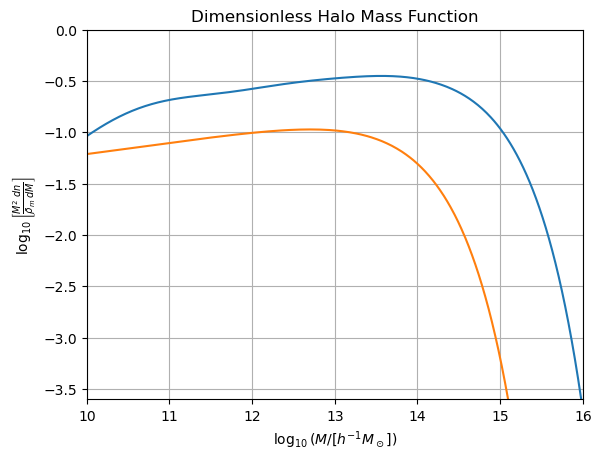

In [48]:
# Constants
H0 = h * 100  # km/s/Mpc
G = 4.302e-9  # Mpc M_sun^-1 (km/s)^2
rho_crit_0 = 3 * H0**2 / (8 * np.pi * G)  # in M_sun / Mpc^3
rho_m = Om0 * rho_crit_0  # mean matter density

# Input data
mass_w1 = np.loadtxt('./results_mf_z03_w1/mass_function/m_h.txt', comments='#')
dndlnmh_w1 = np.loadtxt('./results_mf_z03_w1/mass_function/dndlnmh.txt', comments='#')

# Store each row into a list
dndm_w1 = [row for row in dndlnmh_w1]
dndlnm_w1 = dndlnmh_w1[5]  # pick redshift z=0.5 row

print("mass shape:", mass_w1.shape)
print("dndlnm shape:", dndlnm_w1.shape)

# Convert dn/dlnM to dn/dM
dndm_w1 = dndlnm_w1 / mass_w1  # still in h^3 Mpc^-3


# Compute dimensionless mass function
y = (mass_w1**2 / rho_m) * dndm_w1
y2 = (Mass**2 / rho_m) * dndM

# Plot
#plt.figure(figsize=(6, 4))
plt.plot(np.log10(mass_w1), np.log10(y))
plt.plot(np.log10(Mass), np.log10(y2), label='hmf Tinker08')
plt.xlim(10, 16)
plt.ylim(-3.6, 0)
plt.xlabel(r'$\log_{10}(M / [h^{-1} M_\odot])$')
plt.ylabel(r'$\log_{10}\left[\frac{M^2}{\bar{\rho}_m} \frac{dn}{dM}\right]$')
plt.title('Dimensionless Halo Mass Function')
plt.grid(True)
plt.show()

In [49]:
from scipy.integrate import simps, quad

mass = np.loadtxt('./results_mf_z03/mass_function/m_h.txt', comments='#')  # h^-1 Msun
dndlnmh = np.loadtxt('./results_mf_z03/mass_function/dndlnmh.txt', comments='#')  # h^3 Mpc^-3

c = 299792.458  # Speed of light in km/s
Ol0 = 1.0 - Om0

# --- Sky coverage ---
f_sky = 4000 / 41253  # 4000 deg² in fraction of sky

# --- Redshift grid ---
z_vals = np.linspace(0.1, 3.0, 30)

resultsj = {}
resultst = {}

# Loop over redshifts and compute mass function
for z in z_vals:
    mf = MassFunction(
    z=z,
    cosmo_params={"H0":70, "Om0":0.3, "Ob0":0.04},
    sigma_8=0.9,
    n=0.96,
    hmf_model='Jenkins',
    Mmin=10, Mmax=17, dlog10m=0.01
)
    resultsj[z] = {
        "Mass_j": mf.m,           # Mass array (Msun/h)
        "dndlnM_j": mf.dndlnm     # dn/dlnM (h^3 Mpc^-3)
    }
    
for z in z_vals:
    mf = MassFunction(
    z=z,
    cosmo_params={"H0":70, "Om0":0.3, "Ob0":0.04},
    sigma_8=0.9,
    n=0.96,
    hmf_model='Tinker08',
    Mmin=10, Mmax=17, dlog10m=0.01
)
    resultst[z] = {
        "Mass_t": mf.m,           # Mass array (Msun/h)
        "dndlnM_t": mf.dndlnm     # dn/dlnM (h^3 Mpc^-3)
    }

# --- Cosmology functions ---
def E(z): return np.sqrt(Om0 * (1 + z)**3 + Ol0)
def H(z): return H0 * E(z)

def chi(z):  # comoving distance
    return quad(lambda zp: c / H(zp), 0, z)[0]

def dV_dz(z):
    chiz = chi(z)
    return 4 * np.pi * f_sky * c * chiz**2 / H(z)  # Mpc^3 per dz

def comoving_volume_manual(z):
    return 4 * np.pi / 3 * chi(z)**3

# Print volumes
for z in z_vals:
    vol = comoving_volume_manual(z)
    print(f"z = {z:.1f}, Comoving Volume = {vol:.3e} Mpc^3 (full sky)")



z = 0.1, Comoving Volume = 3.057e+08 Mpc^3 (full sky)
z = 0.2, Comoving Volume = 2.264e+09 Mpc^3 (full sky)
z = 0.3, Comoving Volume = 7.054e+09 Mpc^3 (full sky)
z = 0.4, Comoving Volume = 1.541e+10 Mpc^3 (full sky)
z = 0.5, Comoving Volume = 2.770e+10 Mpc^3 (full sky)
z = 0.6, Comoving Volume = 4.403e+10 Mpc^3 (full sky)
z = 0.7, Comoving Volume = 6.431e+10 Mpc^3 (full sky)
z = 0.8, Comoving Volume = 8.832e+10 Mpc^3 (full sky)
z = 0.9, Comoving Volume = 1.158e+11 Mpc^3 (full sky)
z = 1.0, Comoving Volume = 1.464e+11 Mpc^3 (full sky)
z = 1.1, Comoving Volume = 1.797e+11 Mpc^3 (full sky)
z = 1.2, Comoving Volume = 2.155e+11 Mpc^3 (full sky)
z = 1.3, Comoving Volume = 2.534e+11 Mpc^3 (full sky)
z = 1.4, Comoving Volume = 2.932e+11 Mpc^3 (full sky)
z = 1.5, Comoving Volume = 3.345e+11 Mpc^3 (full sky)
z = 1.6, Comoving Volume = 3.771e+11 Mpc^3 (full sky)
z = 1.7, Comoving Volume = 4.207e+11 Mpc^3 (full sky)
z = 1.8, Comoving Volume = 4.653e+11 Mpc^3 (full sky)
z = 1.9, Comoving Volume = 5

In [50]:
# --- Mass threshold in h^-1 Msun ---
M_min = 1e15 / h #* Om0

# --- Compute dN/dz ---
dndz_vals = []

for i, z in enumerate(z_vals):
    dndlnm_z = dndlnmh[i+1]
    mass_mask = mass >= M_min
    mass_sel = mass[mass_mask]
    dndlnm_sel = dndlnm_z[mass_mask]
    lnmass_sel = np.log(mass_sel)

    # Integrate number density above M_min
    n_z = simps(dndlnm_sel / h**3, lnmass_sel)  # convert to physical units

    # Multiply by volume element
    dNdz = dV_dz(z) * n_z #/2500
    dndz_vals.append(dNdz)
    
dndz_vals_hmf_j = []

for z in z_vals:
    mass = resultsj[z]["Mass_j"]
    dndlnm_z = resultsj[z]["dndlnM_j"]
    
    # Select mass range above M_min
    mass_mask = mass >= M_min
    mass_sel = mass[mass_mask]
    dndlnm_sel = dndlnm_z[mass_mask]
    
    # Integrate over ln(mass) for number density
    lnmass_sel = np.log(mass_sel)
    n_z = simps(dndlnm_sel / h**3, lnmass_sel)  # Convert from (h^3/Mpc^3) to (1/Mpc^3)

    # Multiply by volume element dV/dz (you must define dV_dz)
    dNdz = dV_dz(z) * n_z
    dndz_vals_hmf_j.append(dNdz)
    
dndz_vals_hmf_t = []

for z in z_vals:
    mass = resultst[z]["Mass_t"]
    dndlnm_z = resultst[z]["dndlnM_t"]
    
    # Select mass range above M_min
    mass_mask = mass >= M_min
    mass_sel = mass[mass_mask]
    dndlnm_sel = dndlnm_z[mass_mask]
    
    # Integrate over ln(mass) for number density
    lnmass_sel = np.log(mass_sel)
    n_z = simps(dndlnm_sel / h**3, lnmass_sel)  # Convert from (h^3/Mpc^3) to (1/Mpc^3)

    # Multiply by volume element dV/dz (you must define dV_dz)
    dNdz = dV_dz(z) * n_z
    dndz_vals_hmf_t.append(dNdz)

/tmp/ipykernel_2294050/2341565235.py:15: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  n_z = simps(dndlnm_sel / h**3, lnmass_sel)  # convert to physical units
/tmp/ipykernel_2294050/2341565235.py:34: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  n_z = simps(dndlnm_sel / h**3, lnmass_sel)  # Convert from (h^3/Mpc^3) to (1/Mpc^3)
/tmp/ipykernel_2294050/2341565235.py:53: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  n_z = simps(dndlnm_sel / h**3, lnmass_sel)  # Convert from (h^3/Mpc^3) to (1/Mpc^3)


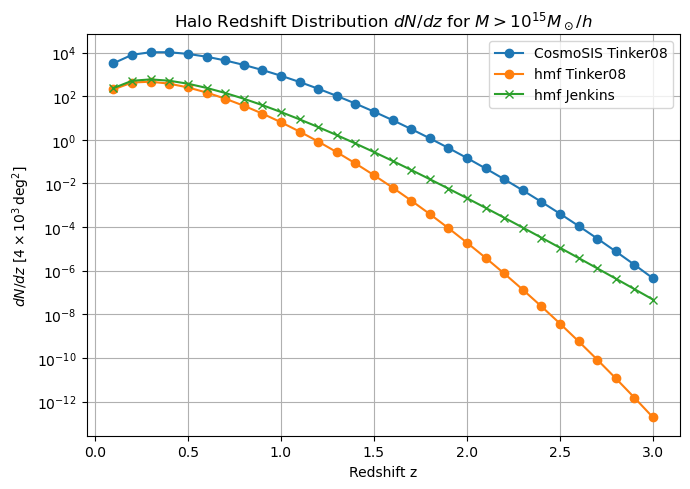

In [57]:
# --- Plot ---
plt.figure(figsize=(7, 5))
plt.plot(z_vals, dndz_vals, marker='o', linestyle='-', label='CosmoSIS Tinker08')
plt.plot(z_vals, dndz_vals_hmf_t, marker='o', linestyle='-', label='hmf Tinker08')
plt.plot(z_vals, dndz_vals_hmf_j, marker='x', linestyle='-', label='hmf Jenkins')
plt.legend()
plt.yscale('log')
#plt.ylim(0, 1e3)
plt.xlabel('Redshift z')
plt.ylabel(r'$dN/dz$ [$4\times 10^3\, \rm deg^2$]')
plt.title(r'Halo Redshift Distribution $dN/dz$ for $M > 10^{15} M_\odot/h$')
plt.grid(True)
plt.tight_layout()
plt.show()

In [52]:
mass_s8 = np.loadtxt('./results_mf_s8/mass_function/m_h.txt', comments='#')
dndlnmh_s8 = np.loadtxt('./results_mf_s8/mass_function/dndlnmh.txt', comments='#')
#m = np.array(mass[:950])
dndm0_s8 = np.array(dndlnmh_s8[0, :])
dndm1_s8 = np.array(dndlnmh_s8[1, :])

In [53]:
plt.loglog(mass[900:], dndm0[900:], label=r'$\sigma_8$=0.9')
plt.loglog(mass_s8[900:], dndm0_s8[900:], label=r'$\sigma_8$=0.5')
plt.legend()
#plt.xscale('log')
plt.xlabel(r'$\log_{10} M_h$')
plt.ylabel(r'$\frac{d n}{d \ln M_h}$')
plt.title('Mass Function with z = 0')
plt.savefig('mf_1.png')

NameError: name 'dndm0' is not defined

In [ ]:
plt.loglog(mass[900:], dndm0[900:], label=r'$\sigma_8$=0.9, z=0', color='#1f77b4')
plt.loglog(mass[900:], dndm1[900:], label=r'$\sigma_8$=0.9, z=1', linestyle='--', color='#1f77b4')
plt.loglog(mass_s8[900:], dndm0_s8[900:], label=r'$\sigma_8$=0.5, z=0', color='#ff7f0e')
plt.loglog(mass_s8[900:], dndm1_s8[900:], label=r'$\sigma_8$=0.5, z=1', linestyle='--', color='#ff7f0e')
plt.legend()
#plt.xscale('log')
plt.xlabel(r'$\log_{10} M_h$')
plt.ylabel(r'$\frac{d n}{d \ln M_h}$')
plt.title('Mass Function')
plt.savefig('mf_1.png')